In [77]:
import pandas as pd
import pickle
import glob
import os
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
catalogue = pd.read_pickle("../data/catalogue.pickle")
catalogue.head(10)

Unnamed: 0,ID,No.,NaN,is_noscemus,if_noscemus_id,"#if is_noscemus = True, don't transcribe",NaN,AUTHORSHIP,NaN,is_one_author,...,NaN,SOURCE OF FILE,link,source_of_file,origin_of_copy,NaN,REFERENCES,catalogue_reference,secondary_references,general_comments
Augurello,NaN,100001,NaN,TRUE,713324,NaN,NaN,NaN,NaN,TRUE,...,NaN,NaN,https://wiki.uibk.ac.at/noscemus/Chrysopoeia,Noscemus,Unknown,NaN,NaN,Noscemus Wiki,Soranzo 2019,The 1518 Basel version is also in Noscemus
Pseudo-Lull Secretis,NaN,100002,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,TRUE,...,NaN,NaN,https://www.digitale-sammlungen.de/en/view/bsb...,MDZ,MBS,NaN,NaN,Hirsch 1950,NaN,"There is a prior, 1514 edition of De secretis ..."
"Pantheus, Ars Transmutatione",NaN,100003,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,TRUE,...,NaN,NaN,NaN,GB,BL,NaN,NaN,NaN,NaN,This book was first published in 1518 with an ...
"Pantheus, Commentarium",NaN,100004,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,TRUE,...,NaN,NaN,https://www.digitale-sammlungen.de/en/view/bsb...,MDZ,MSB,NaN,NaN,NaN,NaN,This 1519 book is catalogued wrongly by many l...
"Pantheus, Voarchadumia",NaN,100005,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,TRUE,...,NaN,NaN,NaN,ONB,ONB,NaN,NaN,NaN,NaN,Dedicated to Leonellus Marquis of Estense
Savonarola 1,NaN,100006,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,TRUE,...,NaN,NaN,https://onb.digital/result/1088C33C,ONB,ONB,NaN,NaN,Hirsch 1950,NaN,NaN
Monteux,NaN,100007,NaN,TRUE,658382,NaN,NaN,NaN,NaN,FALSE,...,NaN,NaN,http://data.onb.ac.at/rep/10541BBB,Noscemus,Unknown,NaN,NaN,Hirsch 1950,Kusukawa 1997,This work is a compendium of writings belongin...
"Agricola, Galerazaya",NaN,100008,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,TRUE,...,NaN,NaN,https://books.google.co.uk/books?id=3IpmAAAAcA...,GB,BL,NaN,NaN,"Hirsch 1950, Ferguson 1906",NaN,This work has been mistakingly ascribed to Geo...
Vegius,NaN,100009,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,FALSE,...,NaN,NaN,http://data.onb.ac.at/rep/1099703B,ONB,ONB,NaN,NaN,Hirsch 1950,NaN,"This is the second edition, the first was publ..."
Bracesco,NaN,100010,NaN,FALSE,NaN,NaN,NaN,NaN,NaN,TRUE,...,NaN,NaN,https://archive.org/details/dealchemiadialo00b...,IA,UCM,NaN,NaN,Ferguson 1906,NaN,Translation from Italian


In [79]:
id_label_dict = {}
for id, index, year in zip(catalogue["No."], catalogue.index, catalogue["date_publication"]):
    id_label_dict[id] = index + " " + year
id_label_dict

{'100001': 'Augurello 1515',
 '100002': 'Pseudo-Lull Secretis 1518',
 '100003': 'Pantheus, Ars Transmutatione 1518',
 '100004': 'Pantheus, Commentarium 1519',
 '100005': 'Pantheus, Voarchadumia 1530',
 '100006': 'Savonarola 1 1532',
 '100007': 'Monteux 1533',
 '100008': 'Agricola, Galerazaya 1631',
 '100009': 'Vegius 1518',
 '100010': 'Bracesco 1548',
 '100011': 'De alchemia 1541 1541',
 '100012': 'Gessner Euonymus 1552',
 '100013': 'Ulstadt Coelum 1525',
 '100014': 'Toxites Spongia 1567',
 '100015': 'Gessner Euonymus II 1569',
 '100016': 'Bonus 1546',
 '100017': 'Bodenstein 1559',
 '100018': 'Trevisan 1567',
 '100019': 'Ulstadt De epidemia 1526',
 '100020': 'Dorn, Artificii chymistici 1569',
 '100021': 'Dorn, Clavis 1567',
 '100022': 'De alchimia opuscula  1550',
 '100023': 'Paracelsus, Labyrinthus 1553',
 '100024': 'Fanianus 1560',
 '100025': 'Pseudo-Lull, Codicillus 1563',
 '100026': 'Garlandius 1560',
 '100027': 'Morienus 1559',
 '100028': 'Pedemontanus 1563',
 '100029': 'Paracelsu

In [92]:
# Get all .txt files in the lemmatized_sents directory
ids = []
file_paths = glob.glob('../data/lemmatized_sents/*.txt')
lemmata_all = []
docs_lemmata = []
for file_path in file_paths:
    id = file_path.rpartition("/")[2].partition(".")[0]
    ids.append(id)
    doc_lemmata = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        # Now 'lines' is a list where each element is a line from the file.
        for line in lines:
            # Process each line (each lemmatized sentence) here
            doc_lemmata.extend(line.strip().split())
    docs_lemmata.append(" ".join(doc_lemmata))
    lemmata_all.extend(doc_lemmata)

In [93]:
labels = [id_label_dict[id] for id in ids]
labels[:10]

['Morienus 1559',
 'Pseudo-Paracelsus, Centum quindecim curationes 1582',
 'Ventura 1571',
 'Garlandius 1560',
 'Rupescissa 1561',
 'Fanianus 1560',
 'Trevisan 1567',
 'Ulstadt De epidemia 1526',
 'Pseudo-Lull, Codicillus 1563',
 'Phaedro, De aquila 1562']

In [82]:
len(lemmata_all)

59723

In [94]:
vocab = [tup[0] for tup in nltk.FreqDist(lemmata_all).most_common(5000)]
vocab[:5]

['aqua', 'facio', 'omnis', 'dico', 'possum']

In [95]:
len(vocab)

5000

In [96]:
docs_lemmata[0]

'morieni romanus eremitae hierosolymitanus transfiguratio metallum occulo summus antiquus philosophus medicinus libellus lux edo priuilegio parisiis gulielmus guillard uia iacobaea diui barbara signum lex regia cautus gulielmus guillard imprimo libellus morienus romanus transfiguratio metallorum impresdo diuendo finis regnum decennius candidus lectori salutem oculus tuus offero auriferus ars libellus paucus uisus multus optatus scriptores inferus aetas laudo locus proferrem breuitas studium ueto arabicus sermo latinus conuerto peruetustus exemplarium nacti alter interperno nomen praefero alter supprimo loquendi modus translator disssideo collatio deprehendio dextere uerbum latini morienus sententia aperio incertus hincocinna loquela multus intersum desideror otiosus reperio alioquus res congruo excipio locus scriba uitium deprauo castrensis conuersio paruus gratus emitto alter margo ascribo discrepantia ago res momentum faxit deus que labor fructuosus ualis irrisori sapientia omnes chr

In [97]:
# Create the vectorizer
vectorizer = TfidfVectorizer(vocabulary=vocab)

# Apply the vectorizer
X = vectorizer.fit_transform(docs_lemmata)

# Getting the shape of X
print("Shape of X :", X.shape)

# Getting the TF-IDF matrix
tf_idf_matrix = X.toarray()

Shape of X : (31, 5000)


In [98]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Run t-SNE
tsne = TSNE(n_components=2, metric='cosine')  # Use 'cosine' as the distance metric
X_embedded = tsne.fit_transform(X.toarray())  # Convert sparse matrix X to dense

(-0.3003715999424458,
 -0.17304584607481957,
 2.669167685508728,
 2.7720068216323854)

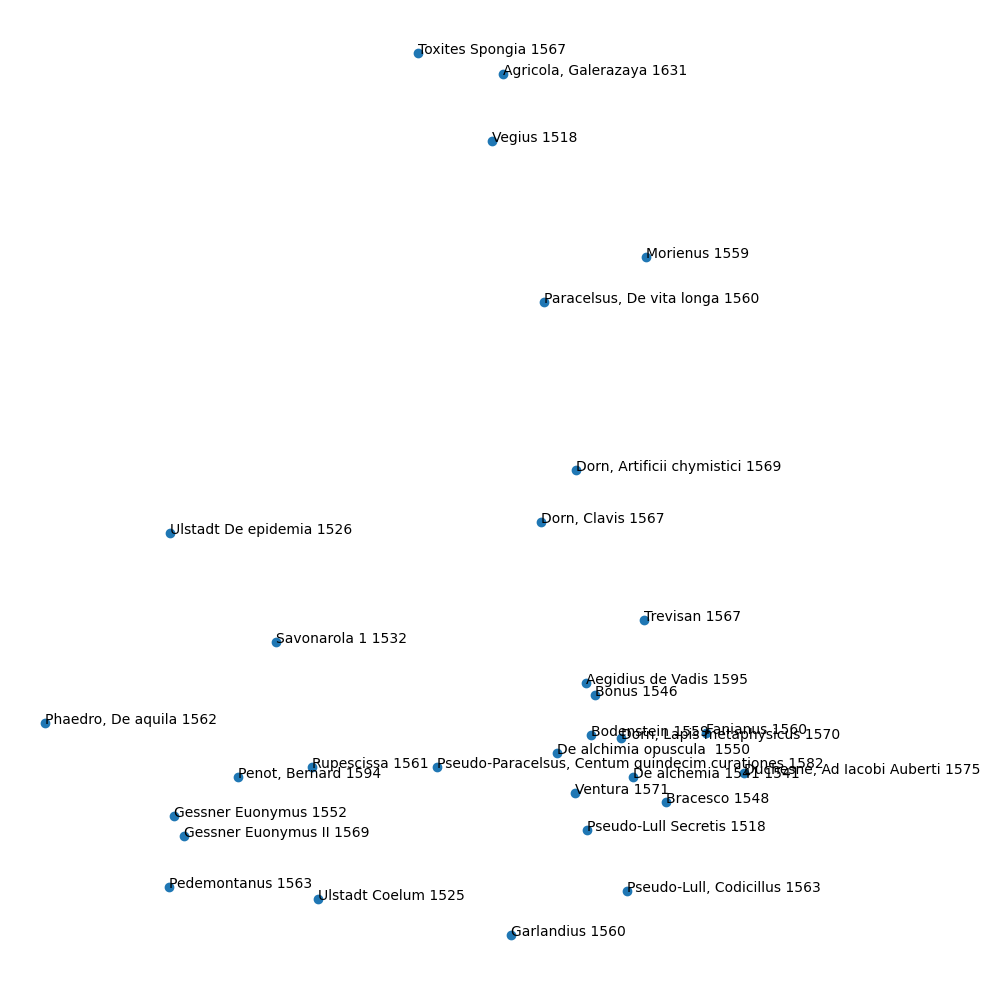

In [99]:
fig, ax = plt.subplots(figsize=(10, 10), tight_layout=True)
# Plot the results
ax.scatter(X_embedded[:, 0], X_embedded[:, 1])

for i, label in enumerate(labels):
    ax.annotate(label, (X_embedded[i, 0], X_embedded[i, 1]))


ax.axis('off')  # Hide axis

In [100]:
fig.savefig('../figures/tsne_tfidf_v1.png')